In [1]:
import numpy as np
from  scipy.stats import poisson , norm
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
p = [0.0, 0.41 , 0 , 0.334]
q = [0.11, 0.45 , 0.12 , 0.345]

In [3]:
def kl(p, q):
    p = np.array(p, dtype=np.float64)
    q = np.array(q, dtype=np.float64)
    result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0.0))
    return result

In [4]:
a = kl(p , q)
a

C:\Users\iliya_pc\AppData\Local\Temp\ipykernel_4148\3644540159.py:4: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0.0))
C:\Users\iliya_pc\AppData\Local\Temp\ipykernel_4148\3644540159.py:4: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0.0))


np.float64(-0.04898981709132113)

In [5]:

b = kl(q , p)
b

C:\Users\iliya_pc\AppData\Local\Temp\ipykernel_4148\3644540159.py:4: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0.0))


np.float64(0.05306987167856284)

In [6]:
x= np.arange(-10 ,10,0.001)
len(x)

20000

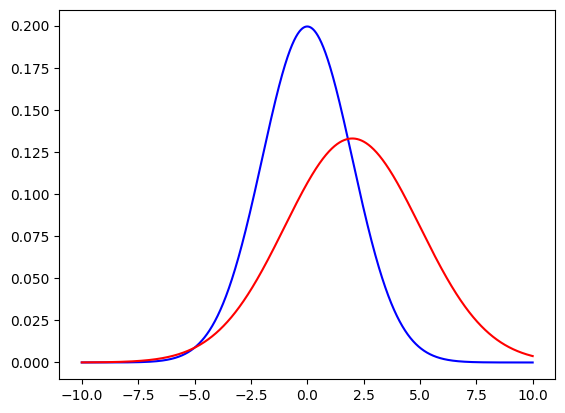

In [7]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 3)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [8]:
kl(p, q)

np.float64(349.91348337868124)

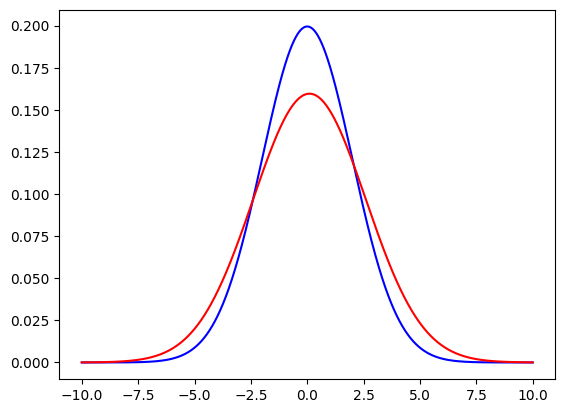

In [9]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 0.1, 2.5)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [10]:
kl(p, q)

np.float64(43.94620233653506)

In [11]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [12]:
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


<Axes: >

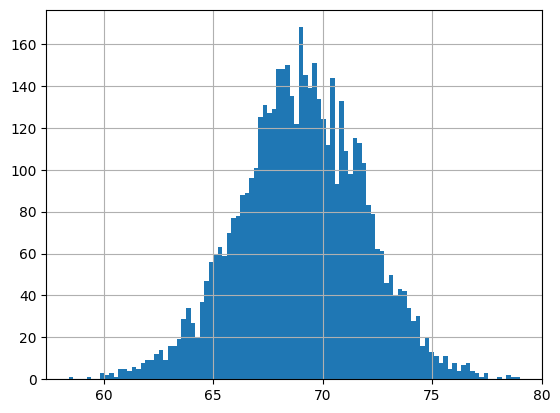

In [13]:
mels = data[data['Gender'] == 'Male'] ['Height']
mels.hist(bins=100)

In [14]:
mels.describe()['mean']

np.float64(69.02634590621741)

In [15]:
mels.describe()['std']

np.float64(2.863362228660647)

In [16]:
count , devision = np.histogram(mels , bins=100)
print(count)
print(devision)

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
[58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.290986

In [17]:
ideal = norm.rvs(size = len(mels),loc=mels.describe()['mean'], scale = mels.describe()['std'])
print(ideal)

[72.89358104 65.7373154  66.50246176 ... 73.48618549 70.68926566
 66.03011479]


In [18]:
icount , idevision = np.histogram(ideal , bins=100)
print(icount)
print(idevision)

[  1   0   0   1   0   3   0   3   3   2   2   3   7   5   3   4   8  11
  15  19  23  22  27  30  32  22  49  44  54  53  59  65  65  92 106  85
 111 127 107 115 127 130 135 143 152 158 130 137 147 179 154 162 144 131
 119 114 104 139 101 113  97  98  70  72  66  56  46  52  41  36  37  37
  22  21  25  17  21  12  12   6   5  15   8   7   2   3   5   0   5   1
   3   0   0   1   0   0   1   2   0   1]
[58.77566115 58.98869501 59.20172887 59.41476273 59.62779659 59.84083045
 60.0538643  60.26689816 60.47993202 60.69296588 60.90599974 61.1190336
 61.33206746 61.54510132 61.75813518 61.97116904 62.1842029  62.39723676
 62.61027062 62.82330448 63.03633834 63.2493722  63.46240606 63.67543992
 63.88847378 64.10150764 64.3145415  64.52757536 64.74060922 64.95364308
 65.16667693 65.37971079 65.59274465 65.80577851 66.01881237 66.23184623
 66.44488009 66.65791395 66.87094781 67.08398167 67.29701553 67.51004939
 67.72308325 67.93611711 68.14915097 68.36218483 68.57521869 68.78825255
 69.001286

(array([  1.,   0.,   0.,   1.,   0.,   3.,   0.,   3.,   3.,   2.,   2.,
          3.,   7.,   5.,   3.,   4.,   8.,  11.,  15.,  19.,  23.,  22.,
         27.,  30.,  32.,  22.,  49.,  44.,  54.,  53.,  59.,  65.,  65.,
         92., 106.,  85., 111., 127., 107., 115., 127., 130., 135., 143.,
        152., 158., 130., 137., 147., 179., 154., 162., 144., 131., 119.,
        114., 104., 139., 101., 113.,  97.,  98.,  70.,  72.,  66.,  56.,
         46.,  52.,  41.,  36.,  37.,  37.,  22.,  21.,  25.,  17.,  21.,
         12.,  12.,   6.,   5.,  15.,   8.,   7.,   2.,   3.,   5.,   0.,
          5.,   1.,   3.,   0.,   0.,   1.,   0.,   0.,   1.,   2.,   0.,
          1.]),
 array([58.77566115, 58.98869501, 59.20172887, 59.41476273, 59.62779659,
        59.84083045, 60.0538643 , 60.26689816, 60.47993202, 60.69296588,
        60.90599974, 61.1190336 , 61.33206746, 61.54510132, 61.75813518,
        61.97116904, 62.1842029 , 62.39723676, 62.61027062, 62.82330448,
        63.03633834, 63.24

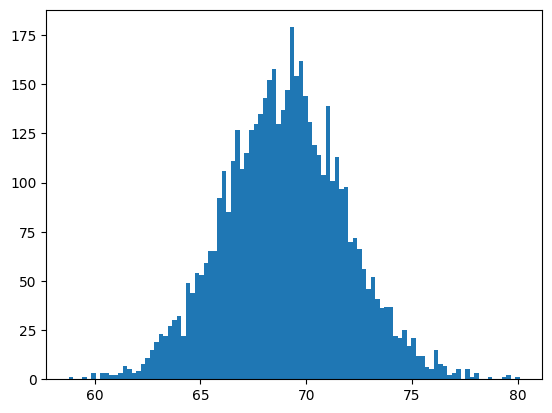

In [19]:
plt.hist(ideal , bins=100)

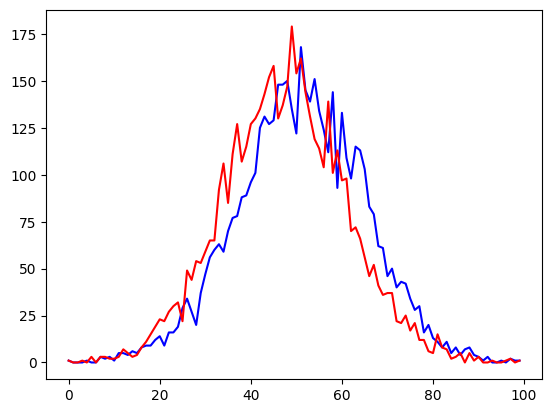

In [21]:
plt.plot(count, c='blue')
plt.plot(icount, c='red')

In [22]:
kl(count , icount)

C:\Users\iliya_pc\AppData\Local\Temp\ipykernel_4148\3644540159.py:4: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0.0))
C:\Users\iliya_pc\AppData\Local\Temp\ipykernel_4148\3644540159.py:4: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0.0))
C:\Users\iliya_pc\AppData\Local\Temp\ipykernel_4148\3644540159.py:4: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0.0))
C:\Users\iliya_pc\AppData\Local\Temp\ipykernel_4148\3644540159.py:4: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0.0))


np.float64(273.1460360679798)

In [23]:
count = count / sum(count)
icount = icount / sum(icount)

In [24]:
kl(count , icount)

C:\Users\iliya_pc\AppData\Local\Temp\ipykernel_4148\3644540159.py:4: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0.0))
C:\Users\iliya_pc\AppData\Local\Temp\ipykernel_4148\3644540159.py:4: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0.0))
C:\Users\iliya_pc\AppData\Local\Temp\ipykernel_4148\3644540159.py:4: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0.0))
C:\Users\iliya_pc\AppData\Local\Temp\ipykernel_4148\3644540159.py:4: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0.0))


np.float64(0.054629207213595994)